In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./../gp_sinkhorn/')
from SDE_solver import solve_sde_RK
from MLE_drift import *
import torch

from celluloid import Camera
from IPython.display import HTML
import math

In [8]:
data,data_cut,cutting_time= pickle.load(open("./../assets/motion_data.pkl","rb"))

In [9]:
d = []
for k in data.keys():
    for i in data[k].keys():
        d.append(data[k][i])

In [16]:
X_0 = torch.Tensor([i[0,:] for i in d])
X_1 = torch.Tensor([i[-1,:] for i in d])


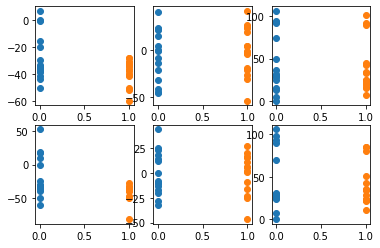

In [17]:

for i in range(X_0.shape[1]):
    plt.subplot(2,3,i+1)
    plt.scatter([0]*X_0.shape[0],X_0[:,i])
    plt.scatter([1]*X_0.shape[0],X_1[:,i])
plt.show()

In [18]:
dt = 0.05
N = int(math.ceil(1.0/dt))
prior_drift = None

result = MLE_IPFP(
    X_0,X_1,N=N,sigma=0.5,
    prior_drift=prior_drift,
    prior_X_0=None, iteration=5, refinement_iterations=0,
    decay_sigma=1, gp_mean_prior_flag=True
)


100%|██████████| 5/5 [00:00<00:00,  5.24it/s]


NameError: name 'feature_x' is not defined

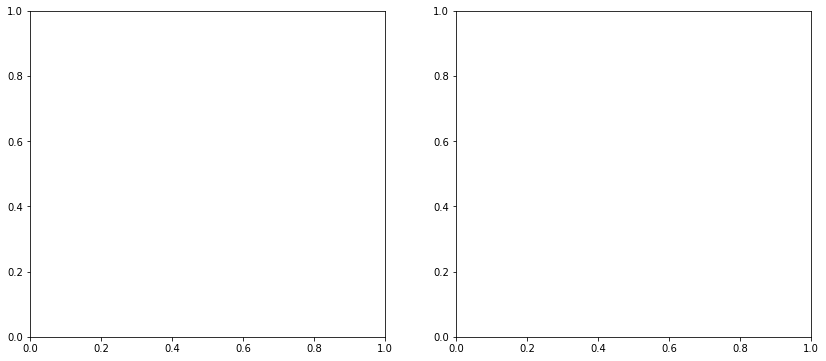

In [19]:

M = result[-1][1]
M2 = result[-1][3]
fig, (ax1, ax2) =  plt.subplots(1, 1,figsize=(14,6))
camera = Camera(fig)
M = result[-1][1]
M2 = result[-1][3]
for i in range(N):    
    fig.scatter()

    camera.snap()
animation = camera.animate()
HTML(animation.to_html5_video())

In [21]:
M.shape

torch.Size([15, 21, 7])

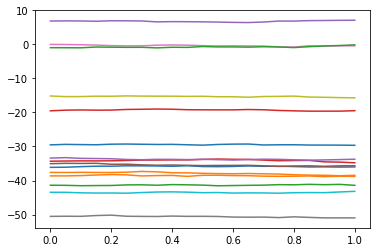

In [25]:
for i in range(M.shape[0]):
    plt.plot(M[i,:,-1],M[i,:,0])